In [16]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns


# Data-oriented programming paradigms
## Exercise 3
### Group 4

Piotr Antosiuk 11929198

Husein Gagajew 11775804

Johannes Fesl 11708466


## Loading Data
### Mercer Data:

In [17]:
def load_mercer_data():
    files = glob.glob('data/mercer_*.csv')
    datalist = []
    for file in files:
        year = int(file[12:16])
        df = pd.read_csv(file, sep=';', header=0, encoding='ISO-8859-1').assign(year=year)
        datalist.append(df)
        
    data = pd.concat(datalist)
    data.sort_values(['year'], ascending=True, inplace=True)
    data.set_index(['year', 'City'], inplace=True)
    data.index.set_names(['year', 'City'], inplace=True)
    return data

mercer_data = load_mercer_data()
mercer_data

Country  Rank
year City                                  
2010 Vienna                   Austria     1
     Canberra               Australia    26
     Calgary                   Canada    28
     Singapore              Singapore    28
     Stuttgart                Germany    30
     Honolulu           United States    31
     Adelaide               Australia    32
     San Francisco      United States    32
     Paris                     France    34
     Helsinki                 Finland    35
     Boston             United States    37
     Lyon                      France    38
     London            United Kingdom    39
     Tokyo                      Japan    40
     Kobe                       Japan    41
     Milan                      Italy    41
     Barcelona                  Spain    44
     Lisbon                  Portugal    45
     Washington, D.C.   United States    45
     Chicago            United States    45
     New York City      United States    49
     Seattle            United States    50
     Dublin                   Ireland    26
     Nuremberg                Germany    24
     Brisbane               Australia    36
     Hamburg                  Germany    23
     Oslo                      Norway    24
     Geneva               Switzerland     3
     Vancouver                 Canada     3
     Auckland             New Zealand     4
...                               ...   ...
2019 Vienna                   Austria     1
     Zagreb                   Croatia    98
     Montreal                  Canada    21
     Stockholm                 Sweden    23
     Nuremberg                Germany    23
     Singapore              Singapore    25
     Madrid                     Spain    46
     Seattle            United States    46
     Edinburgh         United Kingdom    45
     New York City      United States    44
     Barcelona                  Spain    43
     Milan                      Italy    41
     London            United Kingdom    41
     Lyon                      France    40
     Paris                     France    39
     Lisbon                  Portugal    37
     Chicago            United States    49
     Honolulu           United States    37
     Brisbane               Australia    35
     San Francisco      United States    34
     Dublin                   Ireland    33
     Calgary                   Canada    32
     Helsinki                 Finland    31
     Canberra               Australia    30
     Adelaide               Australia    29
     Brussels                 Belgium    28
     Stuttgart                Germany    27
     Oslo                      Norway    25
     Boston             United States    36
     Wroclaw                   Poland   100

[347 rows x 2 columns]

## Numbeo data

In [18]:
def load_numbeo_city_data():
    files = glob.glob('data/numbeo/quality-of-life-city/*.csv')
    datalist = []
    for file in files:
        year = file[33:37]
        df = pd.read_csv(file, sep=';', header=0).assign(year=year)
        city_parts = df['City'].str.split(',', n = 1, expand = True)
        df['City'] = city_parts
        df['Country'] = city_parts[len(city_parts.columns) - 1]
        datalist.append(df)
        
    data = pd.concat(datalist)
    
    data.set_index(['year', 'Country', 'City'], inplace = True)
    data.index.set_names(['year', 'Country', 'City'], inplace = True)
    return data

numbeo_city_data = load_numbeo_city_data()
numbeo_city_data.head()

Rank  Quality of Life Index  \
year Country     City                                    
2012 Germany     Berlin       1                 215.25   
     Switzerland Zurich       2                 213.18   
     Canada      Edmonton     3                 204.86   
     Australia   Perth        4                 196.00   
     Canada      Calgary      5                 190.78   

                           Purchasing Power Index  Safety Index  \
year Country     City                                             
2012 Germany     Berlin                    140.62         77.34   
     Switzerland Zurich                    136.31         83.85   
     Canada      Edmonton                  124.69         58.98   
     Australia   Perth                     118.34         48.75   
     Canada      Calgary                   124.25         71.88   

                           Health Care Index  Cost of Living Index  \
year Country     City                                                
2012 Germany     Berlin                64.81                 89.06   
     Switzerland Zurich                77.78                166.07   
     Canada      Edmonton              78.89                112.10   
     Australia   Perth                 87.04                142.18   
     Canada      Calgary               70.42                111.71   

                           Property Price to Income Ratio  \
year Country     City                                       
2012 Germany     Berlin                              5.74   
     Switzerland Zurich                              8.27   
     Canada      Edmonton                            3.59   
     Australia   Perth                               5.24   
     Canada      Calgary                             4.58   

                           Traffic Commute Time Index  Pollution Index  \
year Country     City                                                    
2012 Germany     Berlin                         23.00            40.00   
     Switzerland Zurich                         27.33            26.50   
     Canada      Edmonton                       35.33            21.25   
     Australia   Perth                          27.00            15.00   
     Canada      Calgary                        62.00            25.08   

                          Climate Index  
year Country     City                    
2012 Germany     Berlin               -  
     Switzerland Zurich               -  
     Canada      Edmonton             -  
     Australia   Perth                -  
     Canada      Calgary              -

In [19]:
def load_numbeo_country_data():
    files = glob.glob('data/numbeo/quality-of-life-country/*.csv')
    datalist = []
    for file in files:
        year = file[36:40]
        df = pd.read_csv(file, sep=';', header=0).assign(year=year)
        datalist.append(df)
        
    data = pd.concat(datalist)
    
    data.set_index(['year', 'Country'], inplace = True)
    data.index.set_names(['year','Country'], inplace = True)
    return data

numbeo_country_data = load_numbeo_country_data()
numbeo_country_data.head()

Rank  Quality of Life Index  \
year Country                                             
2012 Switzerland              1                 194.11   
     Germany                  2                 184.42   
     Norway                   3                 183.43   
     United Arab Emirates     4                 177.07   
     New Zealand              5                 174.28   

                           Purchasing Power Index  Safety Index  \
year Country                                                      
2012 Switzerland                           127.42         74.22   
     Germany                               114.22         78.80   
     Norway                                 94.21         80.93   
     United Arab Emirates                  134.89         64.05   
     New Zealand                            88.59         53.19   

                           Health Care Index  Cost of Living Index  \
year Country                                                         
2012 Switzerland                       79.51                148.69   
     Germany                           71.96                 92.83   
     Norway                            79.04                166.65   
     United Arab Emirates              63.89                 80.79   
     New Zealand                       86.81                107.37   

                           Property Price to Income Ratio  \
year Country                                                
2012 Switzerland                                     6.53   
     Germany                                         4.80   
     Norway                                          7.10   
     United Arab Emirates                            4.49   
     New Zealand                                     5.71   

                           Traffic Commute Time Index  Pollution Index  \
year Country                                                             
2012 Switzerland                                30.88            35.49   
     Germany                                    33.12            45.14   
     Norway                                     18.50            19.22   
     United Arab Emirates                       17.00            69.17   
     New Zealand                                25.25            17.08   

                          Climate Index  
year Country                             
2012 Switzerland                      -  
     Germany                          -  
     Norway                           -  
     United Arab Emirates             -  
     New Zealand                      -

## How do livability rankings correlate with statistics about the countries in which the cities are located?
### Function to load data

This function is to used to load the data provided from UN Data databases. It loads the data, transforms the keys of the countries according to the country to harmonize the keys with Numbeo ranking of cities livability.

Then the data is pivoted to transform description of country's statistics into columns.

In [20]:
country_names_dict = {'Viet Nam': 'Vietnam',
                      'Venezuela (Boliv. Rep. of)': 'Venezuela',
                      'United States of America': 'United States',
                      'Russian Federation': 'Russia',
                      'Czechia': 'Czech Republic',
                      'Iran (Islamic Republic of)': 'Iran',
                      'Republic of Korea': 'South Korea',
                      'Bosnia and Herzegovina': 'Bosnia And Herzegovina',
                      'China, Hong Kong SAR': 'Hong Kong',
                      'China Hong Kong SAR': 'Hong Kong',
                      'Hong Kong SAR': 'Hong Kong',
                      'North Macedonia': 'Macedonia',
                      'TFYR of Macedonia': 'Macedonia',
                      'Slovak Republic': 'Slovakia',
                      'Korea. Republic of': 'South Korea',
                      'Taiwan Province of China': 'Taiwan',
                      'China. People\'s Republic of': 'China'
                     }
def load_and_pivot_data(path, year, index='Country', pivot_column='Series', values='Value', sep=','):
    filepath = path 
    df = pd.read_csv(filepath, sep=sep)
    df.drop(df.loc[df['Year'] != year].index, inplace=True)
    df.replace({'Country': country_names_dict}, inplace=True)
    df = df.pivot(index=index, columns=pivot_column, values=values)
    return df

### Livability ranking

For this analysis we are going to use only the data from Numbeo ranking. Numbeo provides longer list of the cities which are also spread out across countries more equally which makes it probably more relevant. Data from 2019 Numbeo ranking is going to be used. Most of the outside sources provide sampled data with regard to year. However, the years of the samples are mostly inconsistent. The most frequent available year is 2019.

In [21]:
numbeo_2019 = pd.DataFrame(numbeo_city_data.loc['2019', 'Rank'])
numbeo_2019.reset_index(inplace=True)
numbeo_2019['Country'] = numbeo_2019['Country'].apply(lambda country_name: country_name.split(',')[1] if len(country_name.split(',')) > 1 else country_name)
numbeo_2019.set_index(['Country', 'City'], inplace=True)

ranks = numbeo_2019
print(ranks.head())

                         Rank
Country       City           
Australia     Canberra      1
Netherlands   Eindhoven     2
United States Raleigh       3
Australia     Adelaide      4
Switzerland   Zurich        5


C:\Users\Piotr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


### Population

The data comes from the UN Data dataset and presents information about the structure of population in a country. We are going to investigate the relation between the population's structure of the country and livability of the cities.

                Rank  Population aged 0 to 14 years old (percentage)  \
Country City                                                           
Taiwan  Taipei   139                                             NaN   
        Taipei   139                                             NaN   
        Taipei   139                                             NaN   
        Taipei   139                                             NaN   
        Taipei   139                                             NaN   
        Taipei   139                                             NaN   
        Taipei   139                                             NaN   

                Population aged 60+ years old (percentage)  \
Country City                                                 
Taiwan  Taipei                                         NaN   
        Taipei                                         NaN   
        Taipei                                         NaN   
        Taipei                           

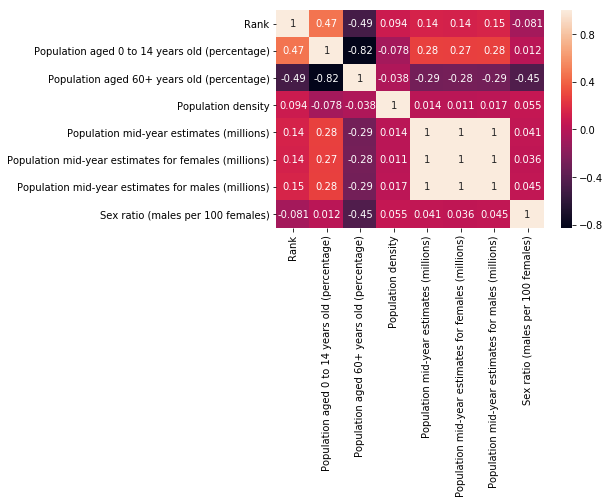

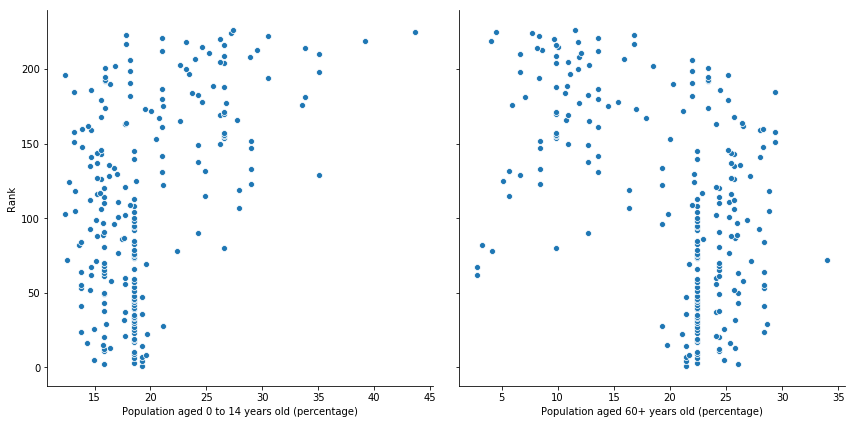

In [22]:
filepath = 'data/un/population_area_density.csv'
population_data_2019 = load_and_pivot_data(filepath, year=2019, sep=';')

ranks_population = ranks.merge(population_data_2019, left_on='Country', right_index=True, how='left')
print(ranks_population[pd.isnull(ranks_population).values])
ranks_population.dropna(inplace=True)

corr = ranks_population.corr()
sns.heatmap(corr, annot=True)

sns.pairplot(ranks_population, 
             x_vars=['Population aged 0 to 14 years old (percentage)', 'Population aged 60+ years old (percentage)'],
             y_vars=['Rank'],
             height=6)

Merge of the first UN database revealed that there were some values missing. The reason for that was different naming of country's in UN database and Numbeo database. This led to fixing the import function by introducing the dictionary which harmonizes keys in UN database to match those from Numbeo database. Unfortunately, there is no separate for Taiwan in UN database because of political reasons. It doesn't make sense to match Taiwan with data from China. Since there's only one city from Taiwan in the databse (Taipei), the record is deleted. 

In the table of correlations with Rank we can see that the correlations between country's population statistics and city liveability are rather weak. The ones which stand out most are percentage of population aged 0-14 and percentage of population aged 60+. The first gives a positive and the second a negative correlation. This means that liveable cities are located in countries with rather older than younger societies. This correlation is caused by the fact that developed countries usually have older societies than developing countries.

### Urban population

We are going to explore the relations between city's livability and the percentage of people in the country living in the cities. The data is obtained from UN Data. The most recent available year is 2018, so it is going to be used in the analysis.

                Rank  Capital city population(thousands)   \
Country City                                                
Taiwan  Taipei   139                                  NaN   
        Taipei   139                                  NaN   

                Urban population(percent)  
Country City                               
Taiwan  Taipei                        NaN  
        Taipei                        NaN  


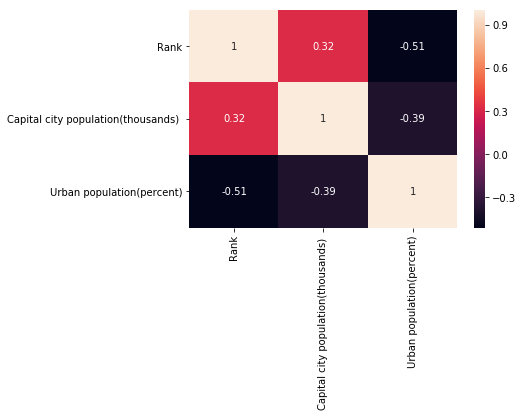

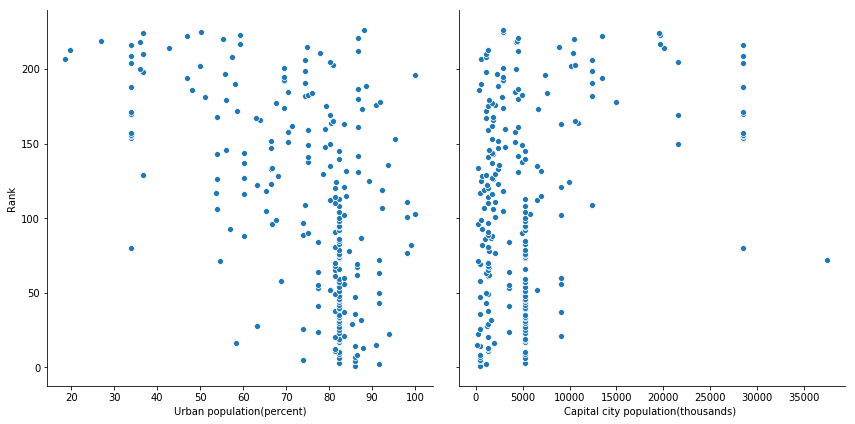

In [23]:
filepath = 'data/un/urban_population.csv'
urban_population_2018 = load_and_pivot_data(filepath, year=2018, sep=';')
urban_population_2018.head()

urban_population_ranks = ranks.merge(urban_population_2018, left_on='Country', right_index=True, how='left')
print(urban_population_ranks[pd.isnull(urban_population_ranks).values])
urban_population_ranks.dropna(inplace=True)

corr = urban_population_ranks.corr()

sns.heatmap(corr, annot=True)

sns.pairplot(urban_population_ranks, 
             x_vars=['Urban population(percent)', 'Capital city population(thousands) '],
             y_vars='Rank',
             height=6)

For 2018 only two series are available: capital city population and percentage of people living in the cities. The stronger correlation is percentage of urban population in the coutry and cities livability. Most livable cities are located in countries where most of the population lives in cities. 

The correlation between city's rank and the population of the capital city is rather weak and positive. There might be a trend that livable cities are not located in countries with megacities as capitals. Visualising a graph of city's position in the ranking vs the population of the capital city proves that right. For smaller capitals (< 10 million people), the position in the ranking depends on other factors.

### GDP

                   Rank  GDP PPP (billions)  GDP PPP per capita  \
Country   City                                                    
Venezuela Caracas   226                 NaN            8065.696   

                   GDP per capita USD  GDP billions USD  
Country   City                                           
Venezuela Caracas            2739.821             70.14  
                     Rank  GDP PPP (billions)  GDP PPP per capita  \
Country                                                             
China          220.000000           27308.857           19503.909   
United States   57.840909           21439.453           23580.531   
India          169.090909           11325.669            8378.377   

               GDP per capita USD  GDP billions USD  
Country                                              
China                   10098.865         14140.163  
United States           17029.251         21439.453  
India                    2171.643          2935.570  


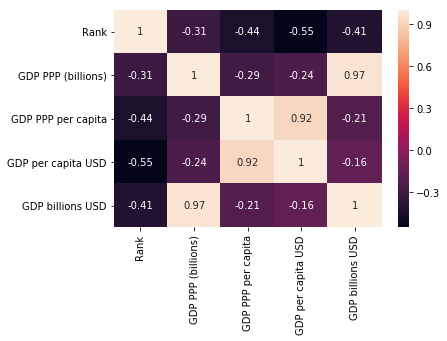

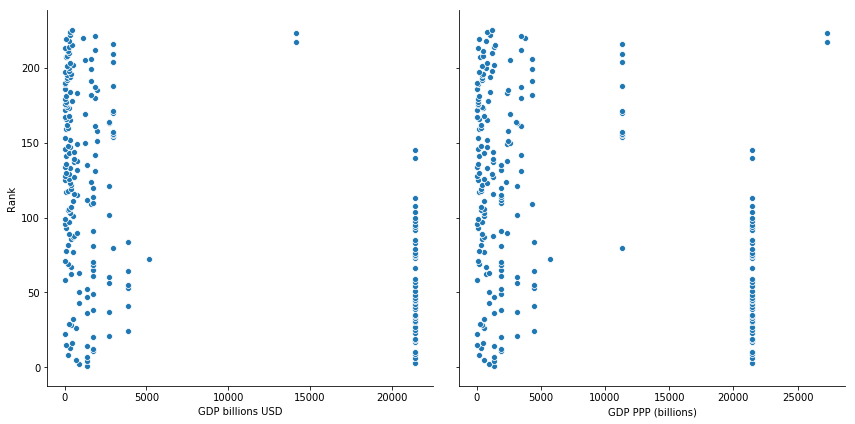

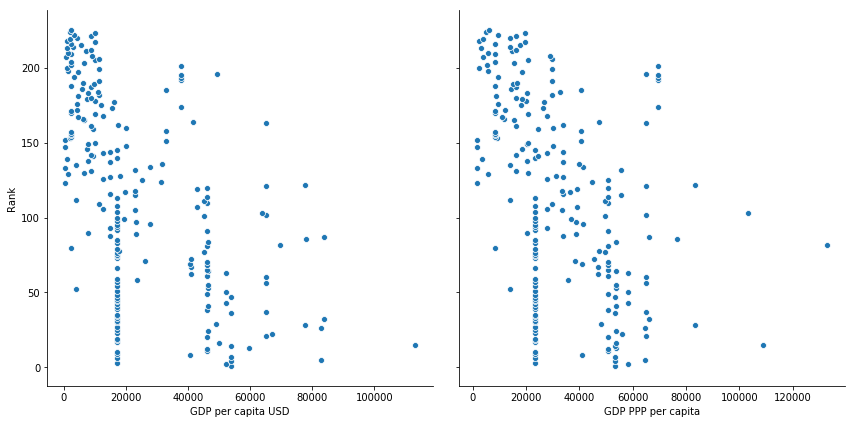

In [24]:
filepath = 'data/imf/gdp_2019.csv'
gdp_2019 = pd.read_csv(filepath, sep=';', na_values='no data')
gdp_2019.replace({'Country': country_names_dict}, inplace=True)
gdp_2019.set_index('Country', inplace=True)

gdp_ranks = ranks.merge(gdp_2019, left_on='Country', right_index=True, how='left')
gdp_ranks.loc['Switzerland', 'GDP PPP per capita'] = 64649 # imputed with value from Wikipedia
gdp_ranks.loc['Switzerland', 'GDP per capita USD'] = 82950 # imputed with value from Wikipedia
print(gdp_ranks[pd.isnull(gdp_ranks).values])
gdp_ranks.dropna(inplace=True)
corr = gdp_ranks.corr()

sns.heatmap(corr, annot=True)

sns.pairplot(gdp_ranks, 
             x_vars=['GDP billions USD', 'GDP PPP (billions)'],
             y_vars='Rank',
             height=6
            )
sns.pairplot(gdp_ranks, 
             x_vars=['GDP per capita USD', 'GDP PPP per capita'],
             y_vars='Rank',
             height=6
            )

print(gdp_ranks.groupby(level='Country').mean().nlargest(3, 'GDP PPP (billions)'))

Data about GDP was acquired from Internation Monetary Fund. After data exploration it turned out that GDP per capita is missing for Switzerland - both nominal and PPP. The values were imputed with 2018 estimates as country is stable. That should not introduce big bias to the data. Another missing data is GDP PPP for Venezuela which is currently facing tough economic situation. For this reason Caracas will be removed from the dataset. 

We can observe in the top 2 figures that the overall country's GDP is not an indicator of the cities livability. In the graph of cities rank vs country's GDP (Purchasive Power Parity) we can identify 3 cluster of top 3 economies by this rank - China, US and India respectively. Especially for the US we can see the different livability rank despite being located in the same country.

The bottom 2 figures show GDP per capita both nominal and taking into account PPP. These values have a higher correlation with cities rank in Numbeo ranking as we can see on the heatmap of correlation matrix. The highest correlation rank is presented by county's nominal GDP per capita. It means that the higher this value is, the more likely the city is to be liveable. This shows that liveable cities are more likely to be located in country's with strong economy. However, the country's wealth has to be spread out across the citizens.

### Employment

We are going to investigate the relations between a strucutre of empolyment in a country and livability of cities in it. The data about employment is obtained from UN Data. Loading and transformation is performed by load_and_pivot_data function.

Country  City  
Taiwan   Taipei    139
         Taipei    139
         Taipei    139
         Taipei    139
         Taipei    139
         Taipei    139
         Taipei    139
         Taipei    139
         Taipei    139
Name: Rank, dtype: int64


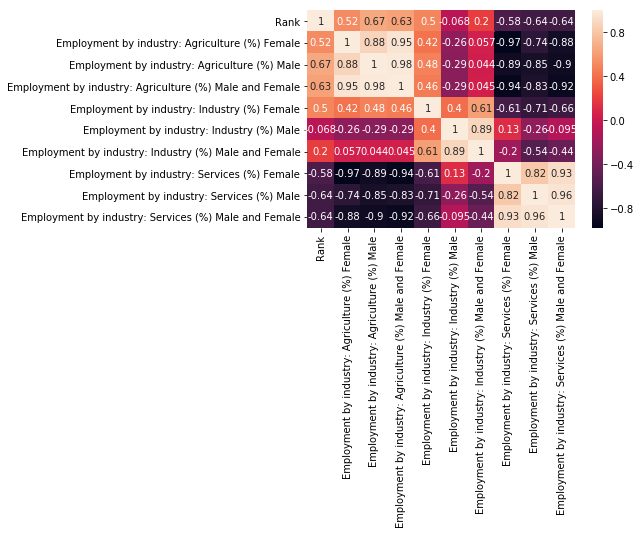

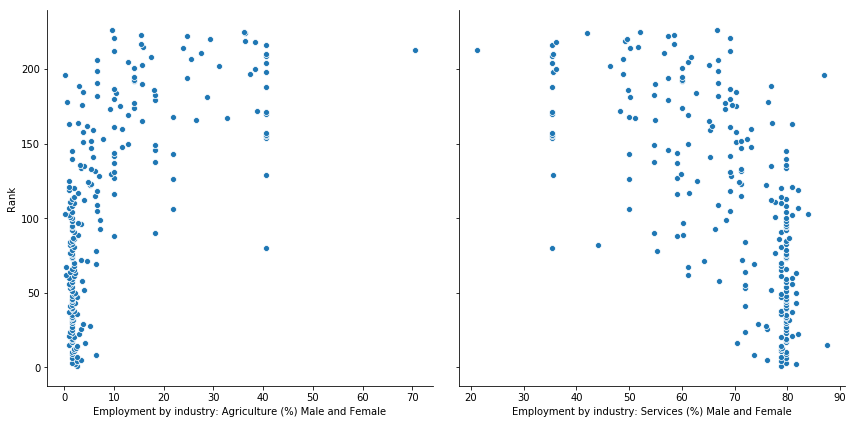

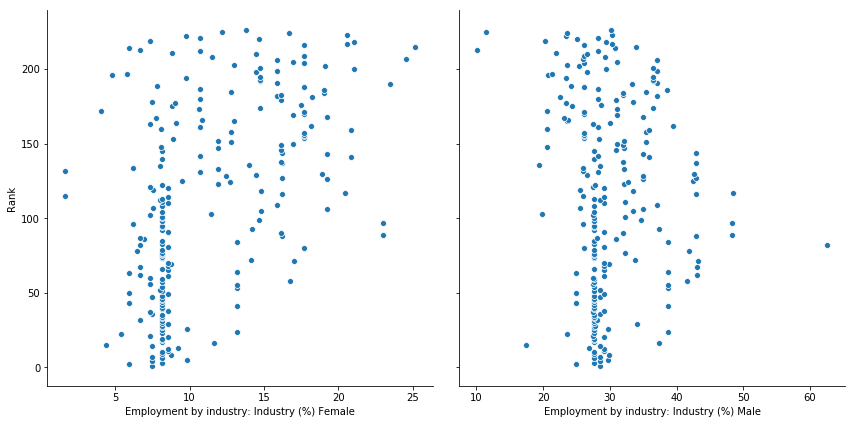

In [25]:
filepath = 'data/un/employment.csv'
employment_2019 = load_and_pivot_data(filepath, year=2019, sep=';')

employment_ranks = ranks.merge(employment_2019, left_on='Country', right_index=True, how='left')
print(employment_ranks[pd.isnull(employment_ranks).values]['Rank'])
employment_ranks.dropna(inplace=True)

corr = employment_ranks.corr()

sns.heatmap(corr, annot=True)

sns.pairplot(employment_ranks, 
             x_vars=['Employment by industry: Agriculture (%) Male and Female',
                    'Employment by industry: Services (%) Male and Female'],
             y_vars='Rank',
             height=6
            )

sns.pairplot(employment_ranks, 
             x_vars=['Employment by industry: Industry (%) Female',
                    'Employment by industry: Industry (%) Male'],
             y_vars='Rank',
             height=6
            )

The only city with missing values is again Taipei, Taiwan.

The heatmap shows quite high correlation both positive and negative between the percentage of population employment in certain industries and cities position in livability ranking. We can identify positive correlation between high employment in agriculture and high position in ranking (low livability). On the other hand, high employment in service industry correlates negatively with position in ranking meaning high livability. Most of the jobs in service industry are located in cities. High employment in services probably means high urbanisation and lot of wealth generated in cities which could lead to better standard of services in cities.

Employment in industry is an interesting case. While both agriculture and services gave similar correlations for both men and women, the results in industry are different. High percentage of women working in industry correlates with high position in the ranking and low livability. In case of men we can observe that the percentage of employment in industry is generally uncorrelated with city's livability.

### Conclusions

The analysis performed above showed that most livable cities are located in countries with high GDP per capita. It turned out that the GDP itself is not a good indicator of cities' livability. Within the US there are several cities with different livability.

Most of the countries with livable cities have rather older than younger population. The country's population density and mid-year population are not a determining factor. In countries with cities positioned highly in livability ranking most of the population lives in cities. However, those cities are not located in country's with megacities as capitals.

Employment structure of a country's population is the important indicator of city's livability. Most livable cities are located in countries in which most of the population works in service industry as opposed to agriculture. Employment in industry gives interesting results as there's a negative correlation between female employment in industry and city's position in livability ranking. For men's employment in industry, there's no correlation with city's livability.